# 🎧 Actividad: Descubriendo Patrones Musicales con Spotify

## 1. Descripción del Caso
Imagina que trabajas como Data Scientist en una plataforma de streaming musical emergente. El equipo de producto quiere mejorar el sistema de recomendación, pero no tienen etiquetas claras para ciertos tipos de canciones.

Te entregan este conjunto de datos sobre 999 canciones y sus caracteristicas https://www.kaggle.com/datasets/glowstudygram/spotify-songs-and-artists-dataset

El objetivo de la actividad es usar algoritmos de agrupamiento (Clustering) para agrupar las canciones más populares del 2023 basándote únicamente en sus características de audio, ignorando el género o el artista. Luego, deberás interpretar qué representa cada grupo.

## 2. Objetivos de Aprendizaje
* Limpieza de datos.
* Estandarización de variables.
* Reducción de dimensionalidad (PCA).
* Clustering (K-Means o DBScan).
* Interpretación de resultados.

### 📝 Bloque 1: Configuración y Carga de Datos
Importa las librerías necesarias y carga el dataset.

In [1]:
# 1. Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# 2. Carga del Dataset
# Asegúrate de subir el archivo a tu entorno de Colab
df = pd.read_csv('/content/spotifydataset.csv')

print(f"Dimensiones del dataset: {df.shape}")
df.head()

Dimensiones del dataset: (1000, 23)


,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


In [2]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'genres', 'followers', 'artist_popularity',
       'artist_url', 'track_name', 'album_name', 'release_date', 'duration_ms',
       'explicit', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

### 🧹 Bloque 2: Limpieza y Preparación
Se recomienda trabajar solamente con las columnas de audio 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'

No uses columnas como el artista o genero para evitar sesgos en la agrupación

In [19]:
# Selección de Features (Características de Audio)
audio_features = [   'duration_ms',       'explicit', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'
]

X = df[audio_features]

# 3. Escalado de Datos (Estandarización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados correctamente.")

Datos escalados correctamente.


In [4]:
X

,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,228639,False,89,0.645,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,173639,True,85,0.795,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,92400,True,83,0.506,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,191013,False,80,0.650,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,214994,True,79,0.787,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,369573,True,69,0.751,0.708,0,-5.653,1,0.0545,0.0482,0.000018,0.1070,0.509,108.970
996,324373,True,64,0.792,0.701,6,-7.198,0,0.2830,0.1050,0.000000,0.7610,0.251,103.890
997,304226,True,60,0.746,0.978,9,-5.324,1,0.0978,0.0555,0.000041,0.0260,0.653,153.809
998,222653,True,59,0.749,0.856,2,-5.833,1,0.2350,0.1070,0.000000,0.7450,0.402,103.773


In [5]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.247746,-0.534179,1.238679,0.200823,-0.070192,-0.067277,-0.262122,0.794557,-0.538762,-0.707668,-0.331336,-0.789715,-0.952150,-0.224734
1,-0.589729,1.872032,1.071126,1.098154,-0.147313,0.486445,0.291770,-1.258562,-0.531018,-0.376933,-0.331471,-0.795218,-0.299172,-0.861119
2,-1.826740,1.872032,0.987349,-0.630704,-1.439104,1.317029,-0.518074,0.794557,-0.550930,1.399684,-0.331471,-0.088114,-0.565518,-1.334449
3,-0.325178,-0.534179,0.861684,0.230734,0.792609,-1.451583,0.561793,0.794557,-0.651599,-0.846195,-0.331363,-0.654898,0.328030,-0.144526
4,0.039976,1.872032,0.819796,1.050296,0.551603,-1.174722,0.122029,0.794557,-0.404905,-0.262648,-0.331181,-0.521456,1.161436,-0.112179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.393722,1.872032,0.400913,0.834937,0.228655,-1.451583,0.336662,0.794557,-0.408224,-0.753728,-0.331389,-0.562726,-0.032826,-0.469815
996,1.705470,1.872032,0.191471,1.080207,0.194915,0.209584,-0.008404,-1.258562,2.119558,-0.557019,-0.331471,3.935778,-1.141169,-0.650988
997,1.398695,1.872032,0.023918,0.805026,1.530086,1.040168,0.410143,0.794557,0.070782,-0.728447,-0.331289,-1.119881,0.585784,1.129314
998,0.156598,1.872032,-0.017970,0.822972,0.942032,-0.897861,0.296461,0.794557,1.588558,-0.550093,-0.331471,3.825723,-0.492488,-0.655160


### 📉 Bloque 3: Reducción de Dimensionalidad (PCA)
Reduce los datos a 2 componentes principales para poder visualizarlos en un gráfico 2D.

In [6]:
# Aplicamos PCA para reducir a 2 componentes
pca = PCA(n_components=2)

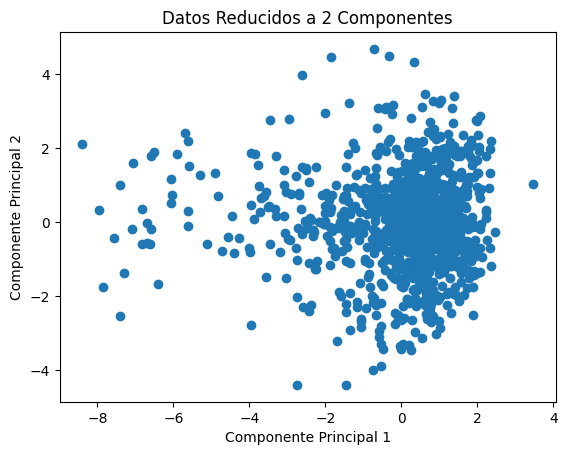

In [7]:
scattered_data = pca.fit_transform(X_scaled)
plt.scatter(scattered_data[:, 0], scattered_data[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos Reducidos a 2 Componentes')
plt.show()

In [8]:
pca.explained_variance_ratio_

array([0.21723524, 0.12552635])

In [9]:
pca.components_

array([[-0.07620375,  0.14926916,  0.17596678,  0.27690632,  0.45494091,
         0.03206652,  0.48330277, -0.06522716,  0.12657501, -0.41028226,
        -0.38238872,  0.13088911,  0.25477347,  0.07628407],
       [-0.3735646 ,  0.37282499,  0.12252041,  0.43480276, -0.31621231,
         0.07334386, -0.20318619, -0.16595643,  0.31099381,  0.27122493,
        -0.1142876 , -0.18157435,  0.28068855, -0.21930241]])

### 🧩 Bloque 4: Modelado (Usa K-Means o DB Scan para generar los clusters)

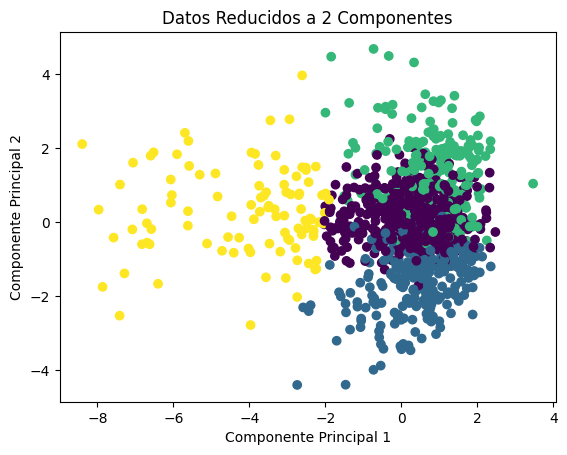

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
kmeans.labels_

plt.scatter(scattered_data[:, 0], scattered_data[:, 1], c=kmeans.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos Reducidos a 2 Componentes')
plt.show()


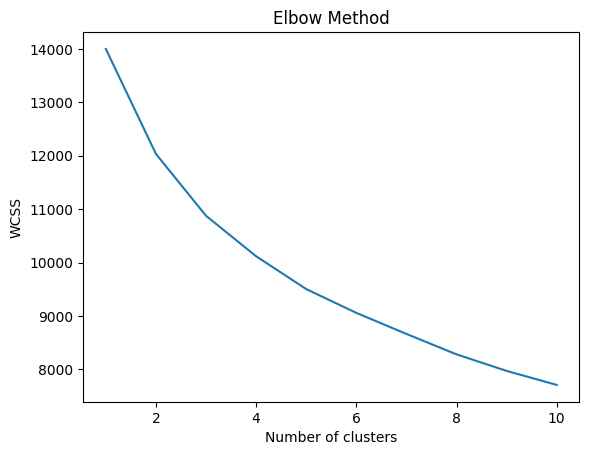

In [11]:
## Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Text(0, 0.5, 'Componente Principal 2')

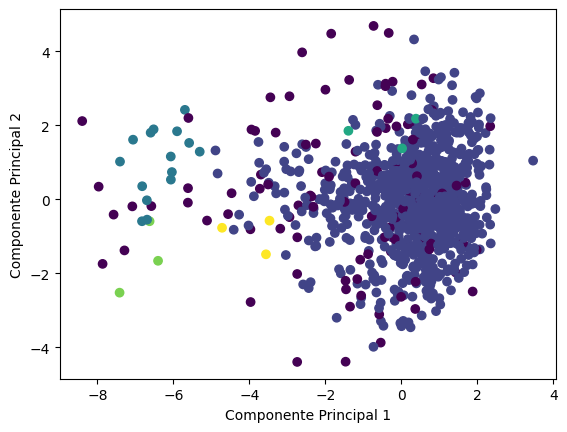

In [12]:
db = DBSCAN(eps=2.8, min_samples=3)
db.fit(X_scaled)
db.labels_

plt.scatter(scattered_data[:, 0], scattered_data[:, 1], c=db.labels_)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

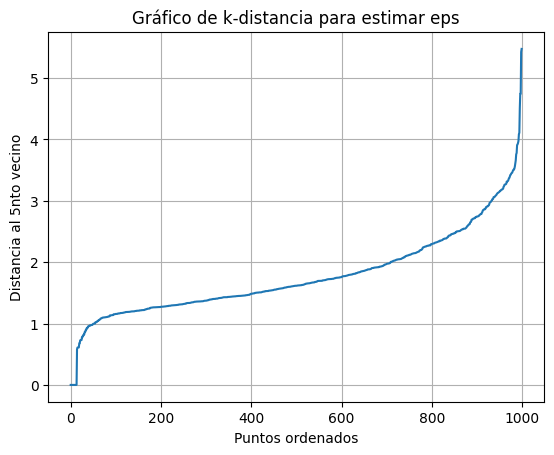

In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 1])  # distancia al 2NDO vecino

plt.plot(distances)
plt.title('Gráfico de k-distancia para estimar eps')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5nto vecino')
plt.grid()
plt.show()


### 🎨 Bloque 5: Visualización y Análisis
Visualiza los clusters y genera un Heatmap para interpretar qué significa cada grupo.

In [20]:
df.groupby('cluster').count()['artist_name']

,artist_name
cluster,
0,65
1,172
2,94
3,87
4,181
5,39
6,147
7,127
8,36


In [22]:
df_cluster = df.groupby('cluster')[audio_features].mean()
df_cluster

,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,,,,
0,230930.276923,0.046154,3.969231,0.613185,0.680308,4.476923,-6.844431,0.661538,0.091511,0.208527,0.031134,0.154995,0.469140,128.243600
1,206842.215116,0.000000,69.732558,0.694500,0.687192,5.034884,-6.296320,1.000000,0.064349,0.213700,0.000664,0.142115,0.662919,115.109308
2,208926.393617,0.042553,61.893617,0.486713,0.371065,5.734043,-10.223447,0.840426,0.041643,0.721862,0.033148,0.147485,0.335745,112.631872
3,215337.057471,0.241379,64.310345,0.573414,0.846678,4.609195,-4.743264,0.758621,0.093907,0.097320,0.018509,0.496759,0.590253,130.948356
4,202852.668508,0.000000,68.961326,0.686227,0.714961,5.983425,-5.660182,0.000000,0.072127,0.213760,0.005176,0.162644,0.614164,117.621039
5,274007.692308,0.025641,20.794872,0.556513,0.691795,5.205128,-8.644282,0.615385,0.061695,0.215054,0.813128,0.197244,0.377956,127.142538
6,202080.040816,1.000000,69.945578,0.726245,0.674027,5.326531,-6.146735,0.537415,0.115739,0.187264,0.006109,0.161033,0.538971,119.012673
7,236307.874016,0.055118,65.118110,0.453016,0.772827,5.196850,-5.519567,0.803150,0.071402,0.090109,0.027808,0.168172,0.353208,140.580961
8,221564.388889,0.000000,48.333333,0.335750,0.163393,4.500000,-23.017139,0.638889,0.049047,0.953833,0.835056,0.120872,0.282114,111.575333


In [23]:
df[df['cluster']==1]['artist_name'].value_counts()

,count
artist_name,
Alan Jackson,7
La Arrolladora Banda El Limón De Rene Camacho,7
Andy Grammer,7
USHER,6
Alfredo Olivas,6
...,...
Rauw Alejandro,1
Agust D,1
The All-American Rejects,1


In [14]:
df['cluster'] = kmeans.labels_
df.head()

,Unnamed: 0,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,...,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,1
1,1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,...,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,6
2,2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,...,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,2
3,3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,...,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,1
4,4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,...,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,6


In [15]:
df.groupby('cluster').count()['artist_url']

,artist_url
cluster,
0,65
1,172
2,94
3,87
4,181
5,39
6,147
7,127
8,36


In [16]:
df_cluster = df.groupby('cluster')[audio_features].mean()
df_cluster

,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,,,,
0,230930.276923,0.046154,3.969231,0.613185,0.680308,4.476923,-6.844431,0.661538,0.091511,0.208527,0.031134,0.154995,0.469140,128.243600
1,206842.215116,0.000000,69.732558,0.694500,0.687192,5.034884,-6.296320,1.000000,0.064349,0.213700,0.000664,0.142115,0.662919,115.109308
2,208926.393617,0.042553,61.893617,0.486713,0.371065,5.734043,-10.223447,0.840426,0.041643,0.721862,0.033148,0.147485,0.335745,112.631872
3,215337.057471,0.241379,64.310345,0.573414,0.846678,4.609195,-4.743264,0.758621,0.093907,0.097320,0.018509,0.496759,0.590253,130.948356
4,202852.668508,0.000000,68.961326,0.686227,0.714961,5.983425,-5.660182,0.000000,0.072127,0.213760,0.005176,0.162644,0.614164,117.621039
5,274007.692308,0.025641,20.794872,0.556513,0.691795,5.205128,-8.644282,0.615385,0.061695,0.215054,0.813128,0.197244,0.377956,127.142538
6,202080.040816,1.000000,69.945578,0.726245,0.674027,5.326531,-6.146735,0.537415,0.115739,0.187264,0.006109,0.161033,0.538971,119.012673
7,236307.874016,0.055118,65.118110,0.453016,0.772827,5.196850,-5.519567,0.803150,0.071402,0.090109,0.027808,0.168172,0.353208,140.580961
8,221564.388889,0.000000,48.333333,0.335750,0.163393,4.500000,-23.017139,0.638889,0.049047,0.953833,0.835056,0.120872,0.282114,111.575333


In [17]:
df[df['cluster']==1]['genres'].value_counts()

,count
genres,
pop,9
"banda, musica mexicana, norteno",7
country,7
"neo mellow, post-teen pop, viral pop",7
"atl hip hop, contemporary r&b, dance pop, pop, r&b, rap, south carolina hip hop, urban contemporary",6
"banda, corrido, musica mexicana, norteno, sad sierreno, sierreno",6
"desi hip hop, filmi, tamil hip hop",6
"pop, singer-songwriter pop, uk pop",5
"dance pop, pop",5


### ❓ Preguntas de Cierre
1. Basado en el Heatmap, ¿qué tipo de canciones (tristes, bailables, acústicas) predominan en los diferentes Clusters?
2. Al incluir la información de artistas, que artistas estan en un mismo cluster? Coincide esto con su genero musical habitual?

### Respuestas de cierre

1. El tipo de canciones que predominan en los clusters son las bailables y acusticas, se evidencia ausencia de canciones melancolicas o tristes.
2. Los artistas que se encuentran en el mismo cluster, son Alan Jackson, La Arrolladora Banda El Limón De Rene Camacho, Andy Grammer, USHER	Alfredo y Olivas, los cuales son de genero musical, norteño, musica mexicana y pop.